In [35]:
import numpy as np
import pandas as pd
import regex as re
import os

In [36]:
os.chdir('/Users/jiamingxu/Downloads')

### Loading CRISPR results

In [109]:
# Load CRISPR results
effect_df = pd.read_csv('CRISPRGeneEffect.csv', index_col=0)

# Load Model information
label_df = pd.read_csv('Model.csv')


#mutation_df = pd.read_csv('CCLE_mutations.csv')

In [110]:
# Take a look at model information
label_df.head()

,ModelID,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,GrowthPattern,...,SourceDetail,CatalogNumber,CCLEName,COSMICID,PublicComments,WTSIMasterCellID,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,60.0,Commercial,SIDM00105,CVCL_0465,HGSOC,Adherent,...,ATCC,NaN,NIHOVCAR3_OVARY,905933.0,NaN,2201.0,HGSOC,High-Grade Serous Ovarian Cancer,Ovarian Epithelial Tumor,Ovary/Fallopian Tube
1,ACH-000002,PT-5qa3uk,HL-60,HL60,36.0,Commercial,SIDM00829,CVCL_0002,AML,Suspension,...,ATCC,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,905938.0,NaN,55.0,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
2,ACH-000003,PT-puKIyc,CACO2,CACO2,72.0,Commercial,SIDM00891,CVCL_0025,COAD,Adherent,...,ATCC,NaN,CACO2_LARGE_INTESTINE,NaN,NaN,NaN,COAD,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Bowel
3,ACH-000004,PT-q4K2cp,HEL,HEL,30.0,Commercial,SIDM00594,CVCL_0001,AML,Suspension,...,DSMZ,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,907053.0,NaN,783.0,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,30.0,Commercial,SIDM00593,CVCL_2481,AML,Unknown,...,ATCC,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid


In [111]:
# Relate ModelID to OncotreeLineage for crossing dataframe usage.

ID_to_Organ = {}
for i in range(label_df.shape[0]):
    ID_to_Organ[label_df.loc[i, 'ModelID']] = label_df.loc[i, 'OncotreeLineage']

In [112]:
# Take a look at CRISPR results
effect_df.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000004,0.014633,-0.032777,-0.151299,-0.071388,0.046511,-0.162850,0.290698,-0.240991,0.176710,0.159418,...,-0.188857,-0.389649,0.112266,-0.002883,0.155729,0.077283,-0.294451,0.143978,0.197069,-0.003338
ACH-000005,-0.261566,0.174833,0.106526,0.135635,-0.076753,-0.278640,0.239279,-0.325967,-0.116848,0.022227,...,-0.195492,-0.360578,-0.126277,-0.059287,0.080543,-0.161894,-0.070230,-0.006275,0.002458,0.014259
ACH-000007,-0.028717,-0.117017,0.030971,0.083795,0.032668,-0.035709,0.012355,-0.192436,-0.077174,0.164877,...,-0.200402,-0.382707,0.006843,0.199553,0.064425,-0.031683,-0.291406,-0.065945,-0.260946,-0.329018
ACH-000009,0.000225,-0.283124,0.051248,0.120321,0.022834,-0.077522,0.028013,-0.190495,0.031589,0.043242,...,-0.179775,-0.285412,-0.029599,0.227176,-0.097506,-0.136990,-0.421927,0.050002,-0.107675,-0.249623
ACH-000011,0.095791,-0.099622,0.022204,0.199771,-0.048126,-0.290812,-0.013277,-0.095840,0.090307,0.029379,...,-0.671885,-0.558008,0.020997,0.011011,0.206251,0.086453,-0.166360,-0.055975,-0.159886,-0.311232


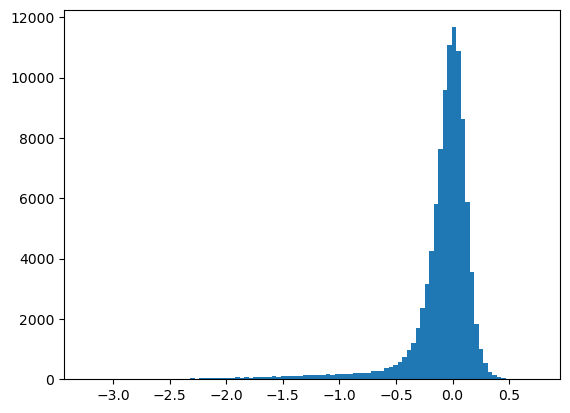

In [113]:
_ = plt.hist(np.array(effect_df.iloc[:100,:1000]).reshape(-1,1), bins=100)

In [114]:
# Add OncotreeLineage column into effect dataframe.
#for i in range(10):#effect_df.shape[0]):
#    ID_ = effect_df.index[i]
#    effect_df.loc[ID_, 'OncotreeLineage'] = ID_to_Organ[ID_] #loc[i, 'DepMap_ID']]

# Onco column for effect dataframe
onco_col_ = []
for i in range(effect_df.shape[0]):
    ID_ = effect_df.index[i]
    onco_col_.append(ID_to_Organ[ID_])
    
onco_series_ = pd.Series(onco_col_, index=effect_df.index, name='OncotreeLineage').str.lower()
effect_df = pd.concat((effect_df, onco_series_), axis=1)


In [115]:
effect_df.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),OncotreeLineage
ACH-000004,0.014633,-0.032777,-0.151299,-0.071388,0.046511,-0.162850,0.290698,-0.240991,0.176710,0.159418,...,-0.389649,0.112266,-0.002883,0.155729,0.077283,-0.294451,0.143978,0.197069,-0.003338,myeloid
ACH-000005,-0.261566,0.174833,0.106526,0.135635,-0.076753,-0.278640,0.239279,-0.325967,-0.116848,0.022227,...,-0.360578,-0.126277,-0.059287,0.080543,-0.161894,-0.070230,-0.006275,0.002458,0.014259,myeloid
ACH-000007,-0.028717,-0.117017,0.030971,0.083795,0.032668,-0.035709,0.012355,-0.192436,-0.077174,0.164877,...,-0.382707,0.006843,0.199553,0.064425,-0.031683,-0.291406,-0.065945,-0.260946,-0.329018,bowel
ACH-000009,0.000225,-0.283124,0.051248,0.120321,0.022834,-0.077522,0.028013,-0.190495,0.031589,0.043242,...,-0.285412,-0.029599,0.227176,-0.097506,-0.136990,-0.421927,0.050002,-0.107675,-0.249623,bowel
ACH-000011,0.095791,-0.099622,0.022204,0.199771,-0.048126,-0.290812,-0.013277,-0.095840,0.090307,0.029379,...,-0.558008,0.020997,0.011011,0.206251,0.086453,-0.166360,-0.055975,-0.159886,-0.311232,bladder/urinary tract


In [120]:
cancer_types = ['kidney', 'liver', 'pancreas', 'bladder', 'ovary', 'colorectal', 'breast', 'lung', 'lymphoid']
# Split to several files based on lineage for group members.
for ct in cancer_types:
    effect_df.loc[effect_df['OncotreeLineage'].str.contains(ct)].drop(columns=[ 'OncotreeLineage']).reset_index(drop = False, inplace=False).transpose().to_csv('{}_CRISPR_gene_effect.csv'.format(ct))

In [121]:
#list((np.array(re.findall('(\S+)\ (\S+) ', " "+" ".join(effect_df.columns))).reshape(1, -1))[0][0::2]) +['OncotreeLineage']

In [122]:
bladder_effect_df = effect_df.loc[effect_df['OncotreeLineage'].str.contains('.')].drop(columns=['OncotreeLineage']).reset_index(drop = True, inplace=False)

In [125]:
bladder_effect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Columns: 17453 entries, A1BG (1) to ZZZ3 (26009)
dtypes: float64(17453)
memory usage: 143.5 MB


In [126]:
gene_names = list(np.array(re.findall('(\S+)\ (\S+) ', " ".join(bladder_effect_df.columns))).reshape(1,-1)[0][::2])

In [127]:
#gene_labels = [ '1' if x < -0.5 else '0' for x in np.median(bladder_effect_df, axis=0)]
gene_median = np.median(bladder_effect_df, axis=0)

In [130]:
# Create dataframe bladder_effect_df_labels contains gene, median, and label of effect
bladder_effect_df_labels = pd.DataFrame({'Gene':bladder_effect_df.columns,
                                         'CRISPR_Label':gene_median
                                        })

In [131]:
bladder_effect_df_labels.head()

,Gene,CRISPR_Label
0,A1BG (1),-0.033926
1,A1CF (29974),-0.042995
2,A2M (2),0.020002
3,A2ML1 (144568),0.078901
4,A3GALT2 (127550),-0.073986


In [ ]:
del effect_df

### Loading RNA-seq results

In [132]:
expression_df = pd.read_csv('OmicsExpressionProteinCodingGenesTPMLogp1.csv', index_col=0)
onco_col_ = []
for i in range(expression_df.shape[0]):
    ID_ = expression_df.index[i]
    onco_col_.append(ID_to_Organ[ID_])
    
onco_series_ = pd.Series(onco_col_, index=expression_df.index, name='OncotreeLineage').str.lower()
expression_df = pd.concat((expression_df, onco_series_), axis=1)
bladder_expression_df = expression_df[expression_df.loc[:, 'OncotreeLineage'].str.contains('.')]

In [133]:
bladder_expression_df.head()

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038),OncotreeLineage
ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000,lung
ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000,cns/brain
ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644,skin
ACH-001538,5.085340,0.000000,7.154211,2.545968,3.084064,0.000000,5.868390,6.165309,4.489928,3.956986,...,0.632268,0.298658,1.641546,0.443607,0.0,0.028569,0.0,0.0,0.000000,biliary tract
ACH-000242,6.729417,0.000000,6.537917,2.456806,3.867896,0.799087,7.208478,5.570159,7.127117,4.568032,...,2.358959,0.084064,1.910733,0.000000,0.0,0.464668,0.0,0.0,0.000000,bladder/urinary tract


In [134]:
bladder_expression_df_labels = pd.DataFrame({'Gene':bladder_expression_df.columns[:-1],
                                             'expression_reads':list(np.average(bladder_expression_df.iloc[:,:-1], axis=0))
                                        })
bladder_expression_df_labels

,Gene,expression_reads
0,TSPAN6 (7105),3.364160
1,TNMD (64102),0.069748
2,DPM1 (8813),6.497023
3,SCYL3 (57147),2.365833
4,C1orf112 (55732),3.672955
...,...,...
19188,ELOA3B (728929),0.019722
19189,NPBWR1 (2831),0.273122
19190,ELOA3D (100506888),0.020217
19191,ELOA3 (162699),0.027780


In [135]:
bladder_expression_df_labels.head()

,Gene,expression_reads
0,TSPAN6 (7105),3.364160
1,TNMD (64102),0.069748
2,DPM1 (8813),6.497023
3,SCYL3 (57147),2.365833
4,C1orf112 (55732),3.672955


In [ ]:
del expression_df

### Loading mutation results

In [117]:
mutation_df = pd.read_csv('OmicsSomaticMutationsMatrixDamaging.csv', index_col=0)

In [119]:
mutation_df.head()

,C1QTNF12 (388581),CASZ1 (54897),PRAMEF18 (391003),NBPF1 (55672),C1QC (714),PHC2 (1912),FOXO6 (100132074),KLF18 (105378952),FAAH (2166),CYP4A11 (1579),...,LINCMD1 (nan),LINC02186 (101927348),AC093249.3 (nan),HNRNPA1P67 (nan),AC011603.5,BRWD1P2 (nan),AC024580.3,AC021660.3 (nan),AC024937.1 (nan),UBE2V1 (7335)
ACH-000839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-001147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-001111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
onco_col_ = []
for i in range(mutation_df.shape[0]):
    ID_ = mutation_df.index[i]
    try:
        onco_col_.append(ID_to_Organ[ID_])
    except:
        onco_col_.append('NotSpeficied')
    
onco_series_ = pd.Series(onco_col_, index=mutation_df.index, name='OncotreeLineage').str.lower()
if 'OncotreeLineage' not in mutation_df.columns:
    mutation_df = pd.concat((mutation_df, onco_series_), axis=1)
bladder_mutation_df = mutation_df[mutation_df.loc[:, 'OncotreeLineage'].str.contains('.', na=False)]
bladder_mutation_df = bladder_mutation_df.transpose()[~bladder_mutation_df.columns.str.contains('nan')].transpose().drop(columns=['OncotreeLineage'])


In [137]:
bladder_mutation_df_labels = pd.DataFrame({'Gene':bladder_mutation_df.columns,
                                        'sum_mutation':list(np.sum(bladder_mutation_df, axis=0))
                                        })
bladder_mutation_df_labels.head()

,Gene,sum_mutation
0,C1QTNF12 (388581),3.0
1,CASZ1 (54897),11.0
2,PRAMEF18 (391003),2.0
3,NBPF1 (55672),1.0
4,C1QC (714),3.0


### Loading 32 dimensional interaction features

In [ ]:
interactions_df = pd.read_csv('Xy_kidney.csv')

In [138]:
interactions_df = pd.read_csv('all_gene_interactions_n10.csv')

---
### Combine three features together

In [165]:
primary_df = bladder_mutation_df_labels.merge(bladder_effect_df_labels, on='Gene', how='inner').merge(bladder_expression_df_labels, on='Gene', how='inner')

In [166]:
primary_df['Gene_Name'] = re.split(' +\(\d+\) ', " ".join(primary_df['Gene']))

In [167]:
primary_df

,Gene,sum_mutation,CRISPR_Label,expression_reads,Gene_Name
0,C1QTNF12 (388581),3.0,-0.059894,1.114828,C1QTNF12
1,CASZ1 (54897),11.0,-0.118528,1.880514,CASZ1
2,PRAMEF18 (391003),2.0,-0.197747,0.001833,PRAMEF18
3,C1QC (714),3.0,0.011830,0.015543,C1QC
4,PHC2 (1912),8.0,-0.091749,5.573377,PHC2
...,...,...,...,...,...
15517,COX6A1 (1337),1.0,-0.580097,9.320230,COX6A1
15518,MRPL43 (84545),5.0,-0.634114,6.001826,MRPL43
15519,MRPL51 (51258),0.0,-0.364261,7.688734,MRPL51
15520,SPTSSB (165679),1.0,0.024090,1.094765,SPTSSB


In [168]:
primary_df = primary_df.merge(interactions_df, left_on='Gene_Name', right_on='node')

In [169]:
primary_df.set_index(primary_df.loc[:, 'Gene'], inplace=True)
primary_df.drop(columns = ['Gene'], inplace=True)#, axis=0)
primary_df.drop(columns = ['id','node','Gene_Name'], inplace=True)


In [173]:
names_dict = {'sum_mutation':'mutation',
             'CRISPR_Label':'essentiality',
             'expression_reads':'expression'}

In [175]:
primary_df.rename(columns=names_dict, inplace=True)

In [177]:
primary_df.to_csv('all_gene_dataset.csv')

In [ ]:
bladder_positive_labels = pd.read_csv('bladder_positive_labels.csv')

In [ ]:
positive_train_df = primary_df.merge(bladder_positive_labels, on=['gene', 'label']).drop(columns=['Gene_Name', 'gene'])

In [ ]:
negative_train_df = primary_df.copy()

In [ ]:
for gene_ in bladder_positive_labels:
    negative_train_df = negative_train_df[~negative_train_df['Gene'].str.contains('gene_')]

In [ ]:
negative_train_df['label'] = 'negative'
negative_train_df.drop(columns=['Gene_Name', 'gene'], inplace=True)

---

## Result analysis

## Univariate Analysis

In [37]:
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('Xy_bladder.csv', index_col=0)

In [39]:
df.head(3)

,label,expression,mutation,essentiality,x_0,x_1,x_2,x_3,x_4,x_5,...,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31
gene,,,,,,,,,,,,,,,,,,,,,
TOP2A,positive,11.67,9.0,-1.805798,-0.302072,0.215720,0.065529,-0.190737,-0.282340,-0.193705,...,-0.177233,0.307264,0.459997,0.343753,0.868781,-0.114447,-0.594151,-0.133051,-0.150855,0.174270
POLA1,positive,8.66,6.0,-1.028587,-0.114576,0.208161,0.477665,0.010713,0.159268,0.038096,...,0.041698,-0.132764,0.362229,0.297360,0.782928,-0.154570,-0.647668,0.306557,-0.782669,-0.554462
MDM4,positive,9.34,1.0,-0.124425,0.240661,0.868630,0.100121,0.435160,-0.250135,-0.351393,...,-0.419870,-0.029094,0.196033,0.147871,1.048864,-0.953445,0.055405,-0.170530,-0.134945,-0.752020


In [40]:
X = df.loc[:,df.columns != 'label']
y = df.label

scores = []

for feature_ in X.columns:
    if feature_ != 'label':
        g1 = X[df['label'] == 'positive'][feature_]
        g1 = np.array(g1, dtype=float)
        g2 = X[df['label'] != 'positive'][feature_]
        g2.sample(frac=0.1, ignore_index=True)
        g2 = np.array(g2, dtype=float)
        for i in range(10):
            g2_ = g2[i::10]
            # Calculate the Mann-Whitney U test statistic and p-value
            _, p = mannwhitneyu(g1, g2_, alternative='two-sided')
            scores.append(p)

In [41]:
scores = np.array(scores, dtype=float).reshape(-1,10)
uni_df = pd.DataFrame(scores.transpose(), columns=X.columns)
medians = uni_df.median(axis=0)
sorted_cols = medians.sort_values().index
uni_df = uni_df[sorted_cols]

## Multivariate analysis

In [51]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
import numpy as np
import pandas as pd
import regex as re
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

feature_importance_shuffle_results = {}
feature_importance_regular_results = {}
cancer_types = ['bladder']

for cancer_ in cancer_types:
    feature_importance_regular_results[cancer_] = []
    X_pos = df.loc[df['label'] == 'positive']
    for i in range(10):
        print('processing sample %i'%(i+1))
        X_neg = df.loc[(df['label'] == 'negative').index[i::10]]
        # define dataset
        X = pd.concat((X_pos.drop(columns=['label']), X_neg.drop(columns=['label'])), axis=0)
        y = pd.concat((X_pos['label'], X_neg['label']), axis=0)
        y_random = y.copy()
        feature_importance_shuffle_results[cancer_] = []
        # define the model
        model = RandomForestClassifier()
        clf = make_pipeline(preprocessing.StandardScaler(), model)
        # fit the model
        clf.fit(X, y)
        # get importance
        importance = clf.steps[1][1].feature_importances_
        feature_importance_regular_results[cancer_] += list(importance)
        for i in range(1000):
            # shuffle labels
            y_random = y_random.sample(frac=1, ignore_index=True)
            # define the model
            # fit the model
            clf.fit(X, y_random)
            # get importance
            importance = clf.steps[1][1].feature_importances_
            feature_importance_shuffle_results[cancer_] += list(importance)
            
            if (i+1)%50 == 0:
                progress_bar = '>'*(i//50) + '=' * (20 - i // 50 ) + f'      {i/10}%'
                print(progress_bar, end='\r')
        print("DONE")

processing sample 1
processing sample 2=      95.0%
processing sample 3=      95.0%
processing sample 4=      95.0%
processing sample 5=      95.0%
processing sample 6=      95.0%
processing sample 7=      95.0%
processing sample 8=      95.0%
processing sample 9=      95.0%
processing sample 10      95.0%


In [52]:
zs = {}

for cancer_ in cancer_types:
    zs[cancer_] = []
    mean = np.average( np.array(feature_importance_shuffle_results[cancer_]).reshape(-1, 35), axis=0)
    std  = np.std( np.array(feature_importance_shuffle_results[cancer_]).reshape(-1, 35), axis=0)
    z = (np.average( np.array(feature_importance_regular_results[cancer_]).reshape(-1, 35), axis=0) - mean) / std
    zs[cancer_].append(z)

In [66]:
regular = np.array(feature_importance_regular_results['bladder'], dtype=float).reshape(-1,35)
shuffle = np.array(feature_importance_shuffle_results['bladder'], dtype=float).reshape(-1,35)

In [85]:
mul_df = pd.DataFrame( (regular-shuffle.mean(axis=0))/shuffle.std(axis=0), columns = X.columns )

In [86]:
medians = mul_df.median(axis=0)
sorted_cols = medians.sort_values().index
mul_df = mul_df[sorted_cols[::-1]]

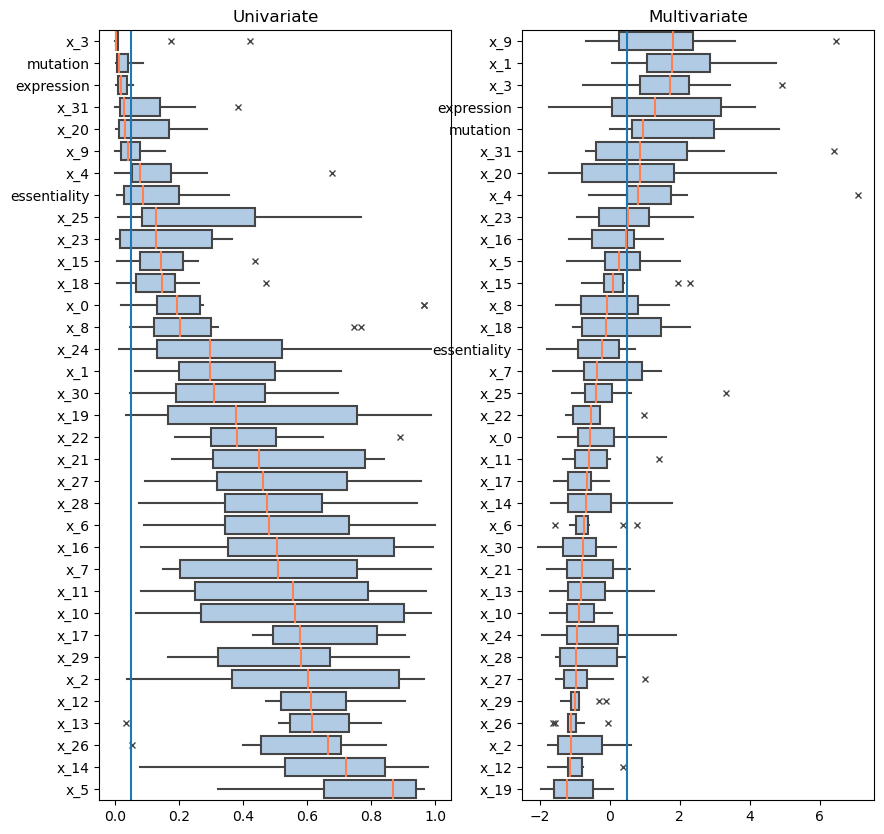

In [89]:
fig, axs = plt.subplots(ncols=2, figsize=(10,10))

sns.boxplot(ax=axs[0],
            data = uni_df, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
           orient='h')
axs[0].axvline(0.05, 0,10)
axs[0].set_title("Univariate")

sns.boxplot(ax=axs[1],
            data = mul_df, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
           orient='h')
axs[1].axvline(0.5, 0,10)
axs[1].set_title("Multivariate")


plt.show()